Linear Regression: It is a supervised machine learning algorithm which defines the relationship between independent and dependent variables.
It is a data anlysis technique used to predict unknown value data value using unknown data value.

Application:
->House Price Prediction
->Stock marketing
->Health care risk analysis

Advantage:
->Simplicity easy to implement
->Efficeincy : quick computation
->Good performance
->Scales to large dataset

Disadvantages:
->Needs more Feature Engineering
->Sensitive to outlier
->overfittin with too many variable 
->if the true relationship is not linear than it not provides occurate prediction

Simple Linear regression : It is a model that describe the relationship between one dependent and independent

The main aim is to find the best fit line in such a way that the actual and predicted should minimum

y=mx+c
y-> dependent variable 
x-> independent variable 
m-> slope of line coefficient 
c-> intercept

y=mx1+mx2+mx3...+c

Simple linear Regression practical implementation

In [1]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

Read the dataset

In [2]:
data=pd.read_csv('Salary Data.csv')
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


EDA: Exploratory Data Analysis and Data Visualization

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [4]:
data.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [5]:
data.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [6]:
data.dropna(inplace=True)
data.shape

(373, 6)

In [7]:
data[data.duplicated()].sum()

Age                                                               1850.0
Gender                 MaleFemaleMaleFemaleMaleFemaleMaleFemaleMaleFe...
Education Level        Bachelor'sBachelor'sMaster'sPhDBachelor'sBache...
Job Title              Junior Business AnalystJunior Marketing Coordi...
Years of Experience                                                482.5
Salary                                                         5120000.0
dtype: object

In [8]:
data.drop_duplicates(inplace=True)
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
348,28.0,Female,Bachelor's,Junior Operations Manager,1.0,35000.0
349,36.0,Male,Bachelor's,Senior Business Development Manager,8.0,110000.0
350,44.0,Female,PhD,Senior Data Scientist,16.0,160000.0
351,31.0,Male,Bachelor's,Junior Marketing Coordinator,3.0,55000.0


<Axes: >

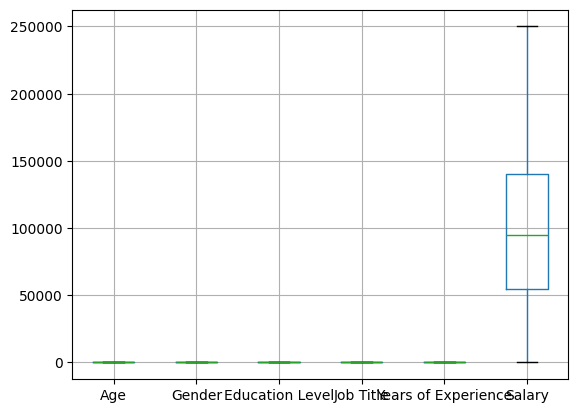

In [55]:
data.boxplot()

In [9]:
correlation=data.corr()
correlation

,Age,Years of Experience,Salary
Age,1.000000,0.979192,0.916543
Years of Experience,0.979192,1.000000,0.924455
Salary,0.916543,0.924455,1.000000


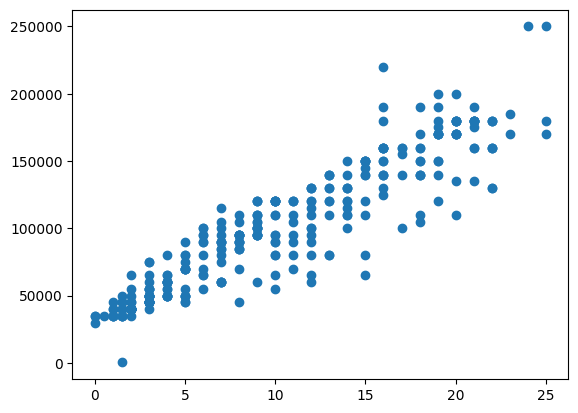

In [10]:
plt.scatter(data['Years of Experience'],data['Salary'])
plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Years of Experience'}>],
       [<Axes: title={'center': 'Salary'}>, <Axes: >]], dtype=object)

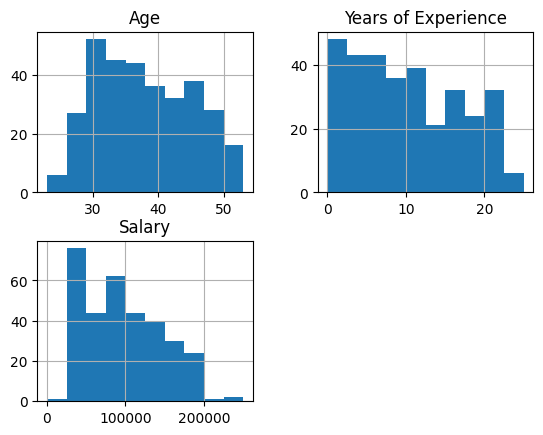

In [11]:
data.hist()

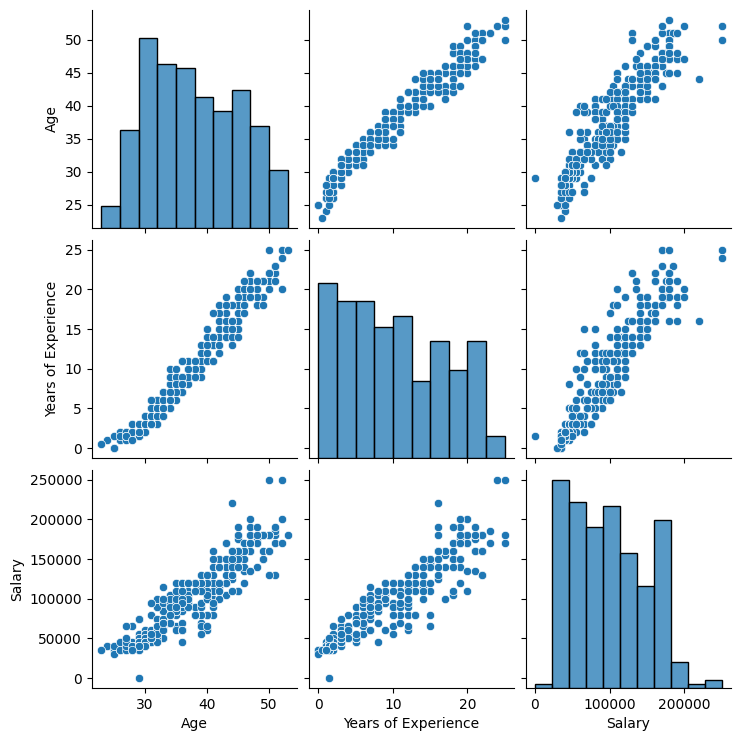

In [12]:
sns.pairplot(data)

<Axes: >

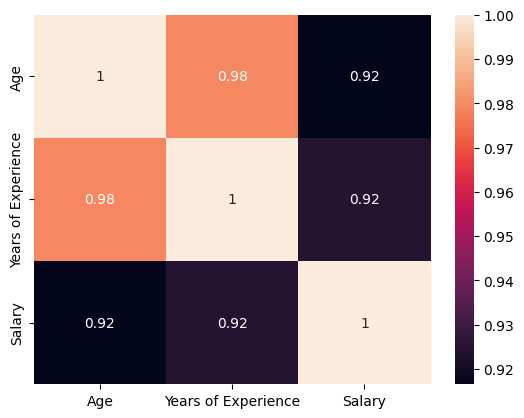

In [13]:
sns.heatmap(data.corr(),annot=True)

Splitting Data

In [14]:
x=data[['Years of Experience']] #Independent feature
y=data['Salary'] # dependent target variable

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((259, 1), (259,), (65, 1), (65,))

Standardization

In [16]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

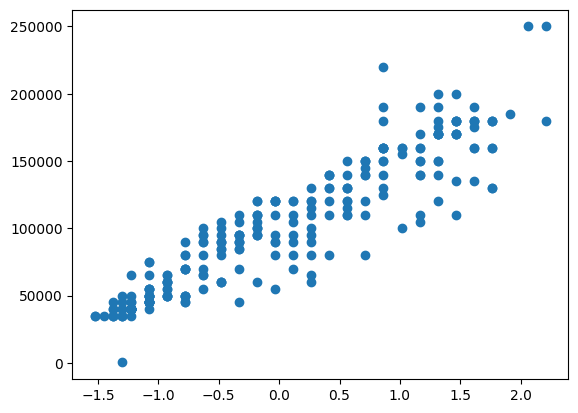

In [17]:
plt.scatter(x_train,y_train)

Model Building

In [18]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [19]:
print('Slope of the model',model.coef_)

Slope of the model [45962.830247]


In [20]:
print('Intercept of the model',model.intercept_)

Intercept of the model 101121.04247104247


In [21]:
# Make predictions
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

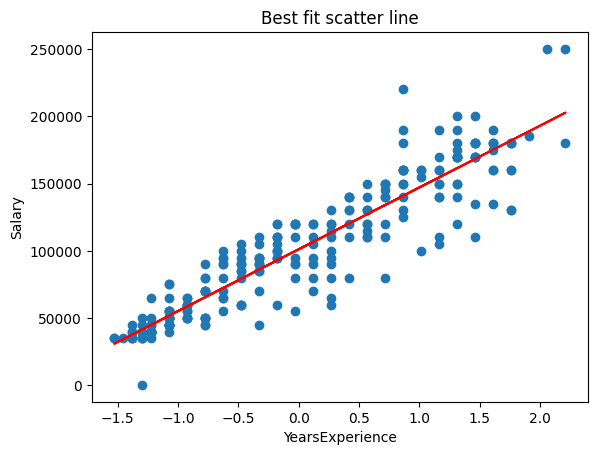

In [22]:
# Training data
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pred_train,'r')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title("Best fit scatter line")
plt.show()

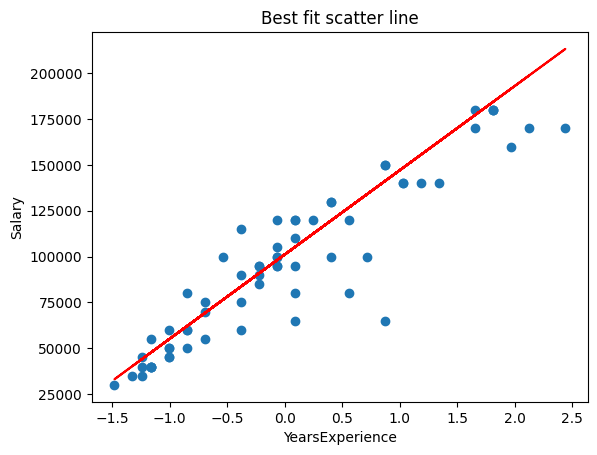

In [23]:
# for Testing data
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred_test,'r')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title("Best fit scatter line")
plt.show()

Model Evaluation

In [24]:
#Error
residual=y_train-y_pred_train
residual

73     -4733.267439
182    11026.949467
17      1620.745565
24     19756.146866
146     9162.350767
           ...     
189    -6300.968089
71    -36514.655735
106    -1597.866139
284     7214.541664
102   -11431.445331
Name: Salary, Length: 259, dtype: float64

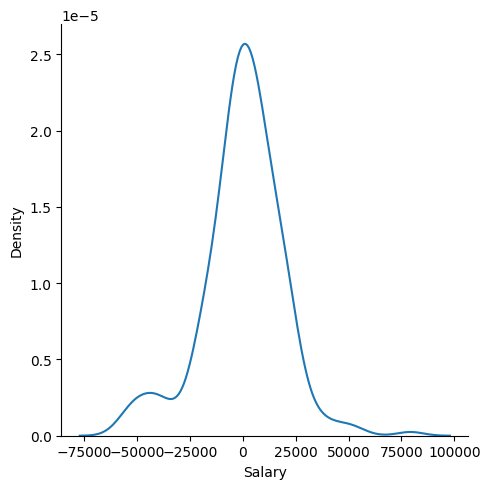

In [25]:
sns.displot(residual,kind='kde')

In [26]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
mse,mae,rmse

(335353293.7431136, 12588.942803686145, 18312.653924079754)

In [27]:
score=r2_score(x_test,y_pred_test)
print("coefficient of determination:",score)

coefficient of determination: -12337955069.084229


Multiple Linear Regression: It is a statistical technique used to build model and relationship between one dependent and multiple independent variable 

In [28]:
data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

Same process follows as in simple lonear Regression

Before spliting data Encode the category to numerical data

In [29]:
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
348,28.0,Female,Bachelor's,Junior Operations Manager,1.0,35000.0
349,36.0,Male,Bachelor's,Senior Business Development Manager,8.0,110000.0
350,44.0,Female,PhD,Senior Data Scientist,16.0,160000.0
351,31.0,Male,Bachelor's,Junior Marketing Coordinator,3.0,55000.0


In [30]:
data.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

Encoding category to numerical

In [32]:
label = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label.fit_transform(data[column])
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0
...,...,...,...,...,...,...
348,28.0,0,0,68,1.0,35000.0
349,36.0,1,0,111,8.0,110000.0
350,44.0,0,2,115,16.0,160000.0
351,31.0,1,0,63,3.0,55000.0


Spliting data

In [33]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8,random_state=42)

In [35]:
#standardization 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [36]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [37]:
model.coef_

array([22554.21060689,  7896.05659469, 13955.43092722,   552.98787169,
       12831.45922025])

In [38]:
model.intercept_

109218.75

<Axes: xlabel='Salary', ylabel='Density'>

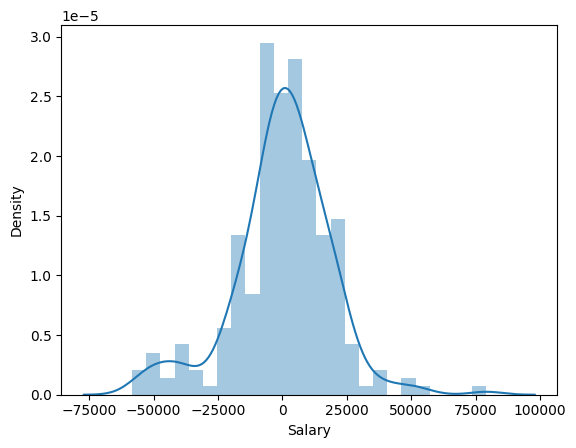

In [39]:
sns.distplot(residual,kde='hue')

In [40]:
# Make predictions
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [41]:
residual=y_test-y_pred_test
residual

132   -25240.838582
108   -32074.143872
137    -6989.306278
9     -40386.238358
181   -20084.504627
           ...     
123   -31338.510438
323   -17123.760417
297   -20821.578231
218   -29540.033637
296    24678.230098
Name: Salary, Length: 260, dtype: float64

In [42]:
# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f'Training set mean squared error: {mse_train:.2f}')
print(f'Training set R^2 score: {r2_train:.2f}')
print(f'Test set mean squared error: {mse_test:.2f}')
print(f'Test set R^2 score: {r2_test:.2f}')


Training set mean squared error: 267895155.54
Training set R^2 score: 0.89
Test set mean squared error: 402560801.90
Test set R^2 score: 0.82


Polynomial Linear Regression

Polynomial Linear Regression :
Polynomial linear regression is a form of linear regression in which the relationship between the independent variable X and the dependent variable Y is modeled as an n-th degree polynomial. While linear regression fits a straight line to the data (first-degree polynomial), polynomial regression can fit curves to the data by introducing higher-degree polynomial terms.

In [49]:
# Sample data
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
y = np.array([1.5, 3.2, 4.8, 8.5, 10.2, 13.5, 17.8, 21.0, 24.8])

In [50]:
# Transform features into polynomial features
poly = PolynomialFeatures(degree=2)  # Change degree as needed
x_poly = poly.fit_transform(x)

In [51]:
# Fit the model
model = LinearRegression()
model.fit(x_poly, y)

LinearRegression()

In [52]:
# Predict
y_pred = model.predict(x_poly)

In [53]:
# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.16094949494949518
R-squared: 0.9972921347168926


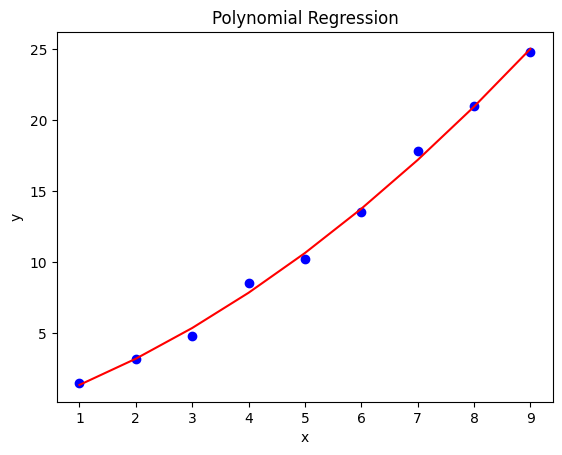

In [54]:
# Plot the results
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.show()